Matrix A (Laplacian):
 [[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]

Matrix B (Dx):
 [[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]

Matrix C (Dy):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


c:\Users\jkreu\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


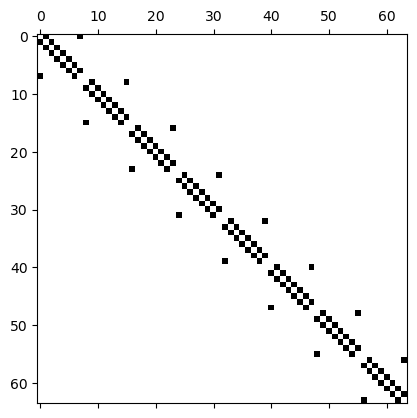

In [ ]:
# Josh Kreutz
# 11/12/2024 
# AMATH 581 HW #4

import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Parameters
L = 20  # Domain length [-10, 10] implies total length of 20
n = 8   # Number of grid points
dx = L / n
x = np.linspace(-L/2, L/2, n, endpoint=False)

# Create second derivative operator with periodic boundary conditions
e = np.ones(n)
D2 = sp.spdiags([e, -2*e, e], [-1, 0, 1], n, n) / dx**2
D2 = sp.csr_matrix(D2)
D2[0, -1] = D2[-1, 0] = 1 / dx**2  # Periodic boundaries

# Construct A = D2_x + D2_y (Laplacian operator in 2D)
I = sp.eye(n)
A = sp.kron(I, D2) + sp.kron(D2, I)

# First derivative operators B = Dx, C = Dy
D = sp.spdiags([-e, e], [-1, 1], n, n) / (2 * dx)
D = sp.csr_matrix(D)
D[0, -1] = -1 / (2 * dx)  # Periodic boundaries
D[-1, 0] = 1 / (2 * dx)   # Periodic boundaries

# Construct B and C using Kronecker products
B = sp.kron(I, D)  # ∂/∂x operator in 2D
C = sp.kron(D, I)  # ∂/∂y operator in 2D

# Convert to dense matrices if needed
A_dense = A.toarray()
B_dense = B.toarray()
C_dense = C.toarray()

# Display matrices for A, B, and C
print("Matrix A (Laplacian):\n", A_dense)
print("\nMatrix B (Dx):\n", B_dense)
print("\nMatrix C (Dy):\n", C_dense)

A1 = A_dense
A3 = B_dense
A2 = C_dense

plt.spy(A2)
plt.spy(A3)

